<a href="https://colab.research.google.com/github/vidyasagar19/Project_Raspberry/blob/master/Attritionmodel_sagar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
!pip install lifelines
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import shap

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=4d0205daf0d6ca7d91fe538f85eb594b3deeebcc5ce013716866d81de25edbb3
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [ ]:
#Upload the input file
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

df = pd.read_excel(fn) # Assuming only one file is uploaded

Saving Credit Estimation Data_V3.0.xlsx to Credit Estimation Data_V3.0.xlsx
User uploaded file "Credit Estimation Data_V3.0.xlsx" with length 942248 bytes


In [ ]:
# Data cleanup
# Convert date columns to datetime objects, handling errors
df['Termination Date'] = pd.to_datetime(df['Termination Date'])
df['Original Hire Date'] = pd.to_datetime(df['Original Hire Date'])
df['Most Recent Hire Date'] = pd.to_datetime(df['Most Recent Hire Date'])
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['Duration'] = np.where(
  df['Termination Date'].isnull(),
    (pd.to_datetime('today') - df['Start Date']).dt.days,
    (df['Termination Date']- df['Start Date']).dt.days)

# Convert datetime objects to Unix timestamps (seconds since epoch)
for col in ['Termination Date', 'Original Hire Date', 'Most Recent Hire Date', 'Start Date']:
    if col in df.columns:
        df[col + '_unix'] = df[col].astype('int64') // 10**9

   Emp ID  LocationID Original Hire Date Most Recent Hire Date Start Date  \
0       6          53         2010-08-21            2016-08-01 2014-10-06   
1     146          53         2011-11-08            2023-08-16 2023-08-16   
2     173           2         2011-04-21            2020-06-26 2020-06-26   
3     299           4         2011-08-01            2011-08-01 2011-08-01   
4     403          53         2012-06-28            2014-10-06 2014-10-06   

  Termination Date            Job Title Employee Status Employee Type  \
0              NaT  Operations - Salary          Active        Salary   
1              NaT       Administration          Active        Hourly   
2              NaT   Lead (Specialty) 1          Active        Hourly   
3              NaT        On Lot Driver          Active        Hourly   
4              NaT  Operations - Salary          Active        Salary   

  Residence State  ...  Total Hours  Total Gross Earnings  Hourly earnings  \
0              GA  .

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7995 - loss: 142044144.0000 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 2

  0%|          | 0/2030 [00:00<?, ?it/s]

shap values: .values =
array([[[ 0.0135311 ],
        [-0.01756777],
        [ 0.00440471],
        ...,
        [ 0.02319014],
        [ 0.01529276],
        [ 0.00901866]],

       [[-0.00336133],
        [ 0.01961359],
        [-0.01524601],
        ...,
        [-0.01140587],
        [-0.01236894],
        [-0.02675965]],

       [[-0.00468505],
        [ 0.01341364],
        [-0.00888514],
        ...,
        [-0.01143224],
        [-0.00556704],
        [-0.0171671 ]],

       ...,

       [[-0.00746827],
        [-0.00839143],
        [ 0.02280082],
        ...,
        [-0.00651369],
        [-0.01176667],
        [-0.01775324]],

       [[-0.00263936],
        [-0.00664329],
        [ 0.02659834],
        ...,
        [-0.01084292],
        [-0.01219846],
        [-0.01660195]],

       [[-0.00804121],
        [-0.01697741],
        [-0.02411098],
        ...,
        [-0.00437772],
        [-0.01579694],
        [-0.02183587]]])

.base_values =
array([[0.61827151],
       [0

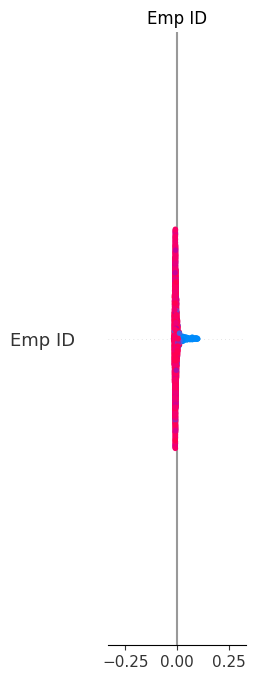

ValueError: visualize() can only display Explanation objects (or arrays of them)!

In [ ]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder on the 'locationID' column
le.fit(df['LocationID'])

# Transform the 'locationID' column
df['LocationID'] = le.transform(df['LocationID'])

print(df.head())

columns_to_process = ['Job Title', 'Employee Status', 'Residence State', 'Employee Type']

for column in columns_to_process:
  if column in df.columns:
    print(f"Values in column '{column}':")
    print(df[column].unique())
    print("---")
  else:
    print(f"Column '{column}' not found in the DataFrame.")


for column in columns_to_process:
  if column in df.columns:
    # Create a LabelEncoder object for each column
    le = LabelEncoder()

    # Fit and transform the column
    df[column] = le.fit_transform(df[column].astype(str)) # Convert to string to handle potential mixed types

    print(f"Values in column '{column}' after encoding:")
    print(df[column].unique())
    print("---")
  else:
    print(f"Column '{column}' not found in the DataFrame.")

print(df.head())
# prompt: check for infinite values in features after conversion

# Check for infinite values in features after converting to numeric
# Convert all columns to numeric, errors='coerce' will replace invalid values with NaN
numeric_df = df.apply(pd.to_numeric, errors='coerce')

# drop emp id column, define features except employee status and labels employee status

# Drop the 'Emp ID' column
#df = df.drop('Emp ID', axis=1)
#df = df.drop('Termination Date', axis=1)
#df = df.drop('Termination Date_unix', axis=1)

# Define features (X) and labels (y)
features = df.drop('Employee Status', axis=1)  # Exclude 'Employee Status' from features
labels = df['Employee Status']
# prompt: split into training and test data



numerical_features = features.select_dtypes(include=np.number)
# Impute missing values using the mean for numerical features
numerical_features = features.select_dtypes(include=np.number)
imputer = SimpleImputer(strategy='mean') # Use 'median' or 'most_frequent' if needed
numeric_features_imputed = pd.DataFrame(imputer.fit_transform(numerical_features), columns=numerical_features.columns)


# Check for infinite values in features after imputation
print(np.isinf(numeric_features_imputed).values.sum())

# Split the data into training and testing sets after imputation
X_train, X_test, y_train, y_test = train_test_split(numeric_features_imputed, labels, test_size=0.2, random_state=42) # 80% train, 20% test

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# prompt: use deep learning instead of voting classifier

# Assuming X_train, y_train, X_test, and y_test are defined as in the previous code.

# Define the deep learning model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2) # Adjust epochs and batch size as needed


# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
# prompt: Analyse feature importance from this deep learning model

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Assuming X_train_scaled and the trained 'model' are available
background_data = shap.sample(X_train_scaled, 20)  # Example: using 100 samples
explainer = shap.KernelExplainer(model, background_data)
shap_values = explainer(X_test_scaled)
# Explain the model's predictions using SHAP values
#explainer = shap.KernelExplainer(model, X_train_scaled) # Use KernelExplainer for deep learning models
#shap_values = explainer.shap_values(X_test_scaled)
print("shap values:", shap_values)
# Visualize the SHAP values
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_train.columns)

# Analyze individual predictions
# Example for the first instance in the test set:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test_scaled[0,:], feature_names=X_train.columns)


In [ ]:
# prompt: remove naan in hourly earnings

# Replace 'NaN' values in 'Hourly Earnings' with the mean of the column
df['Hourly earnings'] = df['Hourly earnings'].fillna(df['Hourly earnings'].mean())


In [ ]:
# drop emp id column, define features except employee status and labels employee status

# Drop the 'Emp ID' column
df = df.drop('Emp ID', axis=1)
df = df.drop('Termination Date', axis=1)
df = df.drop('Termination Date_unix', axis=1)

# Define features (X) and labels (y)
features = df.drop('Employee Status', axis=1)  # Exclude 'Employee Status' from features
labels = df['Employee Status']
# prompt: split into training and test data



numerical_features = features.select_dtypes(include=np.number)
# Impute missing values using the mean for numerical features
numerical_features = features.select_dtypes(include=np.number)
imputer = SimpleImputer(strategy='mean') # Use 'median' or 'most_frequent' if needed
numeric_features_imputed = pd.DataFrame(imputer.fit_transform(numerical_features), columns=numerical_features.columns)


# Check for infinite values in features after imputation
print(np.isinf(numeric_features_imputed).values.sum())

# Split the data into training and testing sets after imputation
X_train, X_test, y_train, y_test = train_test_split(numeric_features_imputed, labels, test_size=0.2, random_state=42) # 80% train, 20% test

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# prompt: use deep learning instead of voting classifier

# Assuming X_train, y_train, X_test, and y_test are defined as in the previous code.

# Define the deep learning model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2) # Adjust epochs and batch size as needed


# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
# prompt: Analyse feature importance from this deep learning model

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Assuming X_train_scaled and the trained 'model' are available
background_data = shap.sample(X_train_scaled, 20)  # Example: using 100 samples
explainer = shap.KernelExplainer(model, background_data)
shap_values = explainer(X_test_scaled)
# Explain the model's predictions using SHAP values
#explainer = shap.KernelExplainer(model, X_train_scaled) # Use KernelExplainer for deep learning models
#shap_values = explainer.shap_values(X_test_scaled)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_train.columns)

# Analyze individual predictions
# Example for the first instance in the test set:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test_scaled[0,:], feature_names=X_train.columns)


KeyError: "['Emp ID'] not found in axis"

In [ ]:
df['Total Hours'] = df['Total Hours'].fillna(df['Total Hours'].mean())

In [ ]:
df['Total Gross Earnings'] = df['Total Gross Earnings'].fillna(df['Total Gross Earnings'].mean())

In [ ]:
# drop emp id column, define features except employee status and labels employee status

# Drop the 'Emp ID' column
df = df.drop('Emp ID', axis=1)
df = df.drop('Termination Date', axis=1)
df = df.drop('Termination Date_unix', axis=1)

# Define features (X) and labels (y)
features = df.drop('Employee Status', axis=1)  # Exclude 'Employee Status' from features
labels = df['Employee Status']
# prompt: split into training and test data



numerical_features = features.select_dtypes(include=np.number)
# Impute missing values using the mean for numerical features
numerical_features = features.select_dtypes(include=np.number)
imputer = SimpleImputer(strategy='mean') # Use 'median' or 'most_frequent' if needed
numeric_features_imputed = pd.DataFrame(imputer.fit_transform(numerical_features), columns=numerical_features.columns)


# Check for infinite values in features after imputation
print(np.isinf(numeric_features_imputed).values.sum())

# Split the data into training and testing sets after imputation
X_train, X_test, y_train, y_test = train_test_split(numeric_features_imputed, labels, test_size=0.2, random_state=42) # 80% train, 20% test

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# prompt: use deep learning instead of voting classifier

# Assuming X_train, y_train, X_test, and y_test are defined as in the previous code.

# Define the deep learning model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2) # Adjust epochs and batch size as needed


# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
# prompt: Analyse feature importance from this deep learning model

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Assuming X_train_scaled and the trained 'model' are available
background_data = shap.sample(X_train_scaled, 20)  # Example: using 100 samples
explainer = shap.KernelExplainer(model, background_data)
shap_values = explainer(X_test_scaled)
# Explain the model's predictions using SHAP values
#explainer = shap.KernelExplainer(model, X_train_scaled) # Use KernelExplainer for deep learning models
#shap_values = explainer.shap_values(X_test_scaled)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_train.columns)

# Analyze individual predictions
# Example for the first instance in the test set:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test_scaled[0,:], feature_names=X_train.columns)


KeyError: "['Emp ID'] not found in axis"

In [ ]:
# prompt: split into training and test data



numerical_features = features.select_dtypes(include=np.number)
# Impute missing values using the mean for numerical features
numerical_features = features.select_dtypes(include=np.number)
imputer = SimpleImputer(strategy='mean') # Use 'median' or 'most_frequent' if needed
numeric_features_imputed = pd.DataFrame(imputer.fit_transform(numerical_features), columns=numerical_features.columns)


# Check for infinite values in features after imputation
print(np.isinf(numeric_features_imputed).values.sum())

# Split the data into training and testing sets after imputation
X_train, X_test, y_train, y_test = train_test_split(numeric_features_imputed, labels, test_size=0.2, random_state=42) # 80% train, 20% test

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# prompt: use deep learning instead of voting classifier

# Assuming X_train, y_train, X_test, and y_test are defined as in the previous code.

# Define the deep learning model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2) # Adjust epochs and batch size as needed


# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
# prompt: Analyse feature importance from this deep learning model

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Assuming X_train_scaled and the trained 'model' are available
background_data = shap.sample(X_train_scaled, 20)  # Example: using 100 samples
explainer = shap.KernelExplainer(model, background_data)
shap_values = explainer(X_test_scaled)
# Explain the model's predictions using SHAP values
#explainer = shap.KernelExplainer(model, X_train_scaled) # Use KernelExplainer for deep learning models
#shap_values = explainer.shap_values(X_test_scaled)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_train.columns)

# Analyze individual predictions
# Example for the first instance in the test set:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test_scaled[0,:], feature_names=X_train.columns)


NameError: name 'features' is not defined

In [ ]:
# Create an object for all the algorithms
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = SVC(probability=True)

# Apply VotingClassifier
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('rf', model3), ('svm', model4)], voting='soft',weights=[1, 0.8, 1.2, 0.9])

# Fit the model
model.fit(X_train,y_train)

# Predict the model
y_pred = model.predict(X_test)

# Calculate the accuracy
print("Accuracy(in %):", accuracy_score(y_test, y_pred)*100)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy(in %): 99.11330049261083


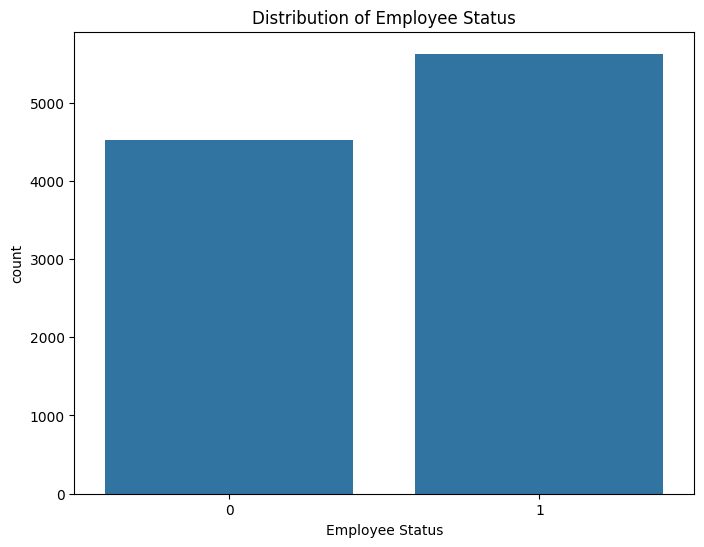

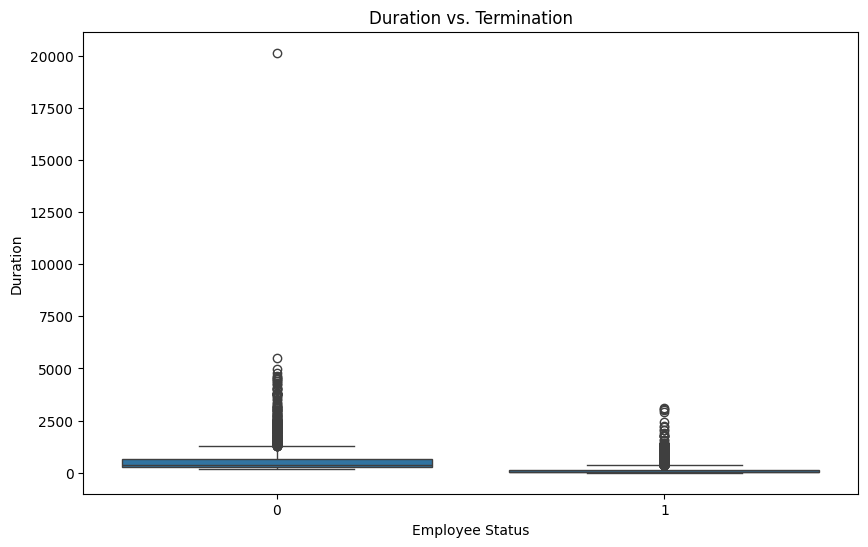

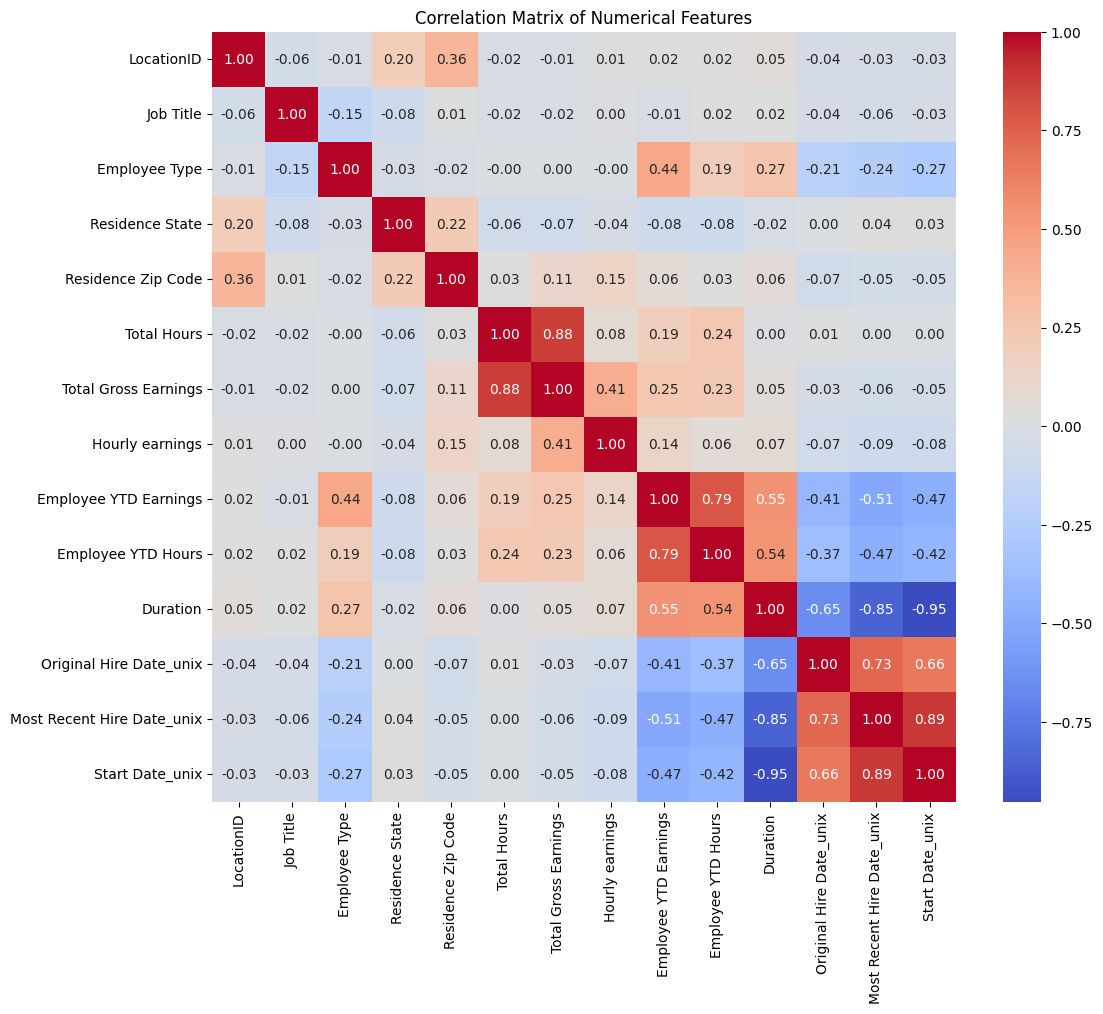

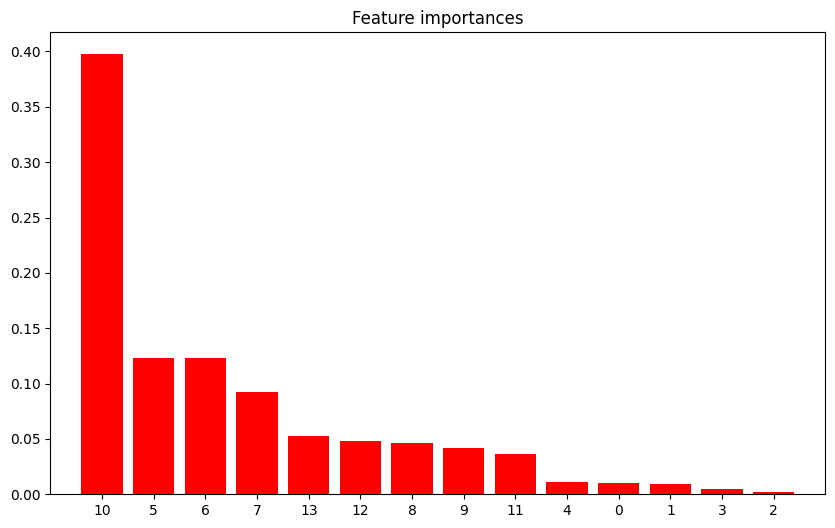

In [ ]:
# prompt: show relevant graphs

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame (as defined in the previous code)

# Example 1: Distribution of Termination
plt.figure(figsize=(8, 6))
sns.countplot(x='Employee Status', data=df)
plt.title('Distribution of Employee Status')
plt.show()

# Example 2: Relationship between Duration and Termination
plt.figure(figsize=(10, 6))
sns.boxplot(x='Employee Status', y='Duration', data=df)
plt.title('Duration vs. Termination')
plt.show()

# Example 3: Correlation matrix heatmap (for numerical features)
plt.figure(figsize=(12, 10))
correlation_matrix = numeric_features_imputed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Example 4: Feature Importance from Random Forest (if applicable)
# Assuming you have a trained RandomForestClassifier model named 'model3'
try:
    importances = model.named_estimators_['rf'].feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature importances")
    plt.bar(range(X_train.shape[1]), importances[indices],
            color="r", align="center")
    plt.xticks(range(X_train.shape[1]), indices)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()
except NameError:
    print("Randomforestclassifier model not found. Cannot plot feature importances.")


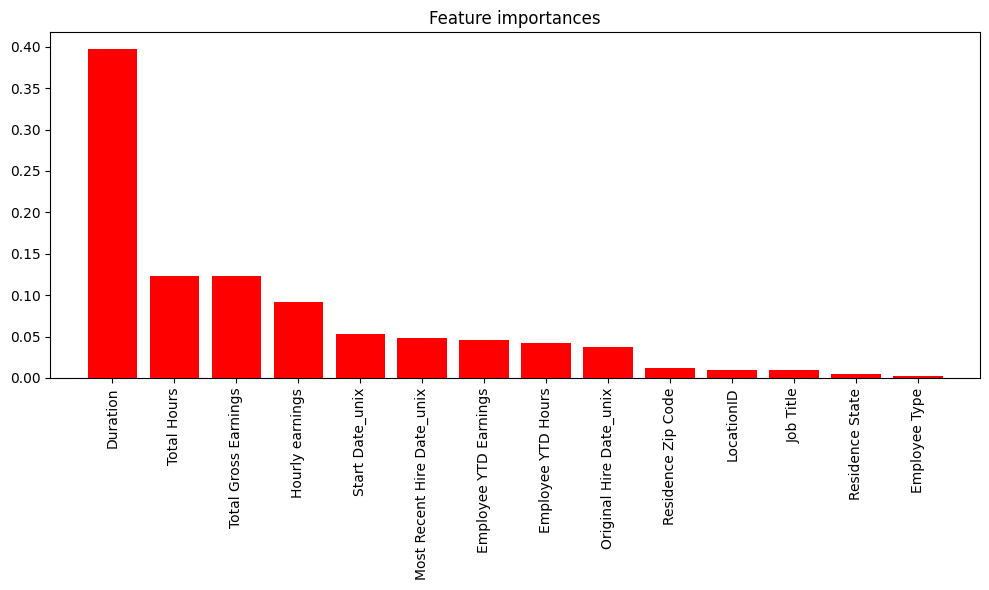

In [ ]:
# prompt: in the above, provide actual labels for the x axis in feature importances graphs

# Example 4: Feature Importance from Random Forest (if applicable)
# Assuming you have a trained RandomForestClassifier model named 'model3'
try:
    importances = model.named_estimators_['rf'].feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature importances")
    plt.bar(range(X_train.shape[1]), importances[indices],
            color="r", align="center")

    # Get feature names from the original DataFrame
    feature_names = X_train.columns

    # Use feature names for x-axis labels
    plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90) # Rotate labels for better readability

    plt.xlim([-1, X_train.shape[1]])
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()
except NameError:
    print("RandomForestClassifier model not found. Cannot plot feature importances.")


In [ ]:
# prompt: predict who is likely to quit

# Assuming the model is already trained as in the provided code.
# Get the feature importances from the RandomForestClassifier
try:
    importances = model.named_estimators_['rf'].feature_importances_
    indices = np.argsort(importances)[::-1]
    feature_names = X_train.columns

    # Identify top important features
    top_n = 10 #Number of top features
    top_features = feature_names[indices][:top_n]
    top_importance = importances[indices][:top_n]

    print("Top", top_n, "Features likely to predict employee termination:")
    for i in range(top_n):
        print(f"{i+1}. {top_features[i]}: {top_importance[i]:.4f}")

except NameError:
    print("RandomForestClassifier model not found. Cannot identify important features.")


# Predict probability of termination for new data
# Example:
new_data_point = pd.DataFrame({
    'LocationID': [1],  # Replace with the actual values for the new employee
    'Job Title': [2],
    'Hourly earnings': [20],
    'Total Hours': [80],
    'Total Gross Earnings': [2000],
    'Start Date_unix': [1678886400],  # Example Unix timestamp, replace with relevant value
    'Original Hire Date_unix': [1678886400],  # Example Unix timestamp, replace with relevant value
    'Most Recent Hire Date_unix': [1678886400],  # Example Unix timestamp, replace with relevant value
    # Add other feature values as necessary
    'Residence State': [1],
    'Employee Type': [1],
    'Duration': [100],
    'Employee YTD Earnings': [0],# Add missing columns with default values
    'Employee YTD Hours': [0],# Add missing columns with default values
    'Residence Zip Code': [0]# Add missing columns with default values
})

# Get the list of columns used during fitting
original_columns = numerical_features.columns

# Ensure new_data_point has the same columns and order
new_data_point = new_data_point.reindex(columns=original_columns, fill_value=0) # Select and reorder columns
new_data_point.columns = new_data_point.columns.str.replace('\xa0', ' ', regex=True)
# Now perform the imputation
new_data_point_imputed = pd.DataFrame(imputer.transform(new_data_point), columns=new_data_point.columns)


probabilities = model.predict_proba(new_data_point_imputed)
termination_probability = probabilities[0][1] # Assuming '1' represents termination

print(f"The probability of this employee terminating is: {termination_probability:.4f}")


Top 10 Features likely to predict employee termination:
1. Duration: 0.3975
2. Total Hours: 0.1235
3. Total Gross Earnings: 0.1231
4. Hourly earnings: 0.0922
5. Start Date_unix: 0.0529
6. Most Recent Hire Date_unix: 0.0484
7. Employee YTD Earnings: 0.0462
8. Employee YTD Hours: 0.0419
9. Original Hire Date_unix: 0.0368
10. Residence Zip Code: 0.0114
The probability of this employee terminating is: 0.7308


In [ ]:
# prompt: in this data set predict who is likely to quit among where Employee status column is 0

# Assuming features and labels are defined as in the previous code
# and X_train, X_test, y_train, y_test are already split

# Filter the test set for employees who have not terminated (Employee Status == 0)
X_test_no_termination = X_test[y_test == 0]

# Predict the likelihood of termination for those employees
y_pred_no_termination = model.predict_proba(X_test_no_termination)

# The prediction is a probability score for termination.
# The first column is the probability of not terminating (Termination = 0)
# The second column is the probability of termination (Termination = 1)

# Get the probability of termination for each employee
termination_probabilities = y_pred_no_termination[:, 1]


# You can now analyze termination_probabilities to find those likely to quit.
# For example, find those with the highest probability of quitting

# Sort the employees by their probability of termination
sorted_indices = np.argsort(termination_probabilities)[::-1]  # Sort in descending order

# Print the top N employees likely to quit (e.g., top 20)
N = 20
top_N_likely_to_quit = sorted_indices[:N]

# Print employee indices with the highest probabilities
print("Indices of top", N, "employees likely to quit (among those who haven't terminated yet):")
print(top_N_likely_to_quit)

# Assuming you want to display information about these employees
# You can access the original data from X_test_no_termination and the corresponding indices

# You can further investigate the specific data of these employees from the X_test_no_termination DataFrame.


top_N_indices_in_X_test = X_test.index[y_test == 0][top_N_likely_to_quit]


print("\nDetails of employees likely to quit (with original data):\n")
df.loc[top_N_indices_in_X_test]



Indices of top 20 employees likely to quit (among those who haven't terminated yet):
[524 295 394 680 239 471 592 400 435 715 583  25 684  35  81 403 237 774
 695 773]

Details of employees likely to quit (with original data):



,LocationID,Original Hire Date,Most Recent Hire Date,Start Date,Job Title,Employee Status,Employee Type,Residence State,Residence Zip Code,Total Hours,Total Gross Earnings,Hourly earnings,Employee YTD Earnings,Employee YTD Hours,Duration,Original Hire Date_unix,Most Recent Hire Date_unix,Start Date_unix
513,146,2019-06-26,2020-07-10,2020-07-10,208,0,0,34,84120,31.082127,483.987901,15.371053,7680.36,536.27,1683.0,1561507200,1594339200,1594339200
3,4,2011-08-01,2011-08-01,2011-08-01,253,0,0,9,30260,31.082127,483.987901,15.371053,4376.75,309.50,4949.0,1312156800,1312156800,1312156800
1369,11,2022-07-22,2022-07-22,2022-07-22,242,0,0,5,6108,8.000000,188.240000,23.530000,2745.12,170.50,941.0,1658448000,1658448000,1658448000
1372,11,2022-07-25,2022-07-25,2022-07-25,242,0,0,5,6042,31.082127,483.987901,15.371053,5975.98,379.00,938.0,1658707200,1658707200,1658707200
952,79,2021-07-26,2022-11-09,2022-11-09,301,0,0,8,33012,31.082127,483.987901,15.371053,208.00,16.00,831.0,1627257600,1667952000,1667952000
10141,15,2024-09-06,2024-09-06,2024-09-06,174,0,0,0,35234,6.750000,104.630000,15.500741,104.63,6.75,164.0,1725580800,1725580800,1725580800
1516,45,2022-10-28,2022-10-28,2022-10-28,253,0,0,8,33015,31.082127,483.987901,15.371053,1215.65,97.25,843.0,1666915200,1666915200,1666915200
1310,142,2022-06-08,2022-06-08,2022-06-08,328,0,0,34,84010,31.082127,483.987901,15.371053,3515.52,219.72,985.0,1654646400,1654646400,1654646400
2239,59,2023-05-12,2023-05-12,2023-05-12,138,0,0,8,32073,31.082127,483.987901,15.371053,504.00,36.00,647.0,1683849600,1683849600,1683849600
10074,86,2024-09-03,2024-09-03,2024-09-03,138,0,0,15,70126,6.000000,72.000000,12.000000,72.00,6.00,167.0,1725321600,1725321600,1725321600


In [ ]:
# prompt: which factors lead to attrition in this

# Assuming 'model' and 'X_test_no_termination' are defined from the previous code

# Get feature importances from the RandomForestClassifier (if available)
try:
    importances = model.named_estimators_['rf'].feature_importances_
    feature_names = X_test_no_termination.columns
    # Create a DataFrame to display feature importances
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print("\nFeature Importances:\n", feature_importance_df)
except AttributeError:
    print("\nFeature importances not available for this model type.")

# Analyze the coefficients from the Logistic Regression model
try:
    coefficients = model.named_estimators_['lr'].coef_[0]  # Get coefficients
    feature_names = X_test_no_termination.columns
    coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
    print("\nLogistic Regression Coefficients:\n", coefficients_df)
except AttributeError:
    print("\nCoefficients not available for this model type.")



Feature Importances:
                        Feature  Importance
10                    Duration    0.397477
5                  Total Hours    0.123450
6         Total Gross Earnings    0.123053
7              Hourly earnings    0.092190
13             Start Date_unix    0.052857
12  Most Recent Hire Date_unix    0.048444
8        Employee YTD Earnings    0.046244
9           Employee YTD Hours    0.041854
11     Original Hire Date_unix    0.036819
4           Residence Zip Code    0.011381
0                   LocationID    0.010075
1                    Job Title    0.009190
3              Residence State    0.004928
2                Employee Type    0.002037

Logistic Regression Coefficients:
                        Feature   Coefficient
4           Residence Zip Code  4.302212e-07
1                    Job Title  2.393460e-08
3              Residence State  1.229108e-08
12  Most Recent Hire Date_unix  7.368202e-09
11     Original Hire Date_unix  3.616038e-09
2                Employee 

In [ ]:
print(features.head(20))

    LocationID Original Hire Date Most Recent Hire Date Start Date  Job Title  \
0           53         2010-08-21            2016-08-01 2014-10-06        259   
1           53         2011-11-08            2023-08-16 2023-08-16          9   
2            2         2011-04-21            2020-06-26 2020-06-26        210   
3            4         2011-08-01            2011-08-01 2011-08-01        253   
4           53         2012-06-28            2014-10-06 2014-10-06        259   
5           53         2012-02-03            2020-10-05 2018-01-18        267   
6            4         2011-09-02            2015-01-09 2015-01-09        253   
7            2         2001-01-01            2017-07-07 2017-07-07         25   
8            2         2012-07-26            2024-06-07 2024-06-07        301   
9            4         2001-01-04            2023-08-14 2023-08-14        253   
10          53         2009-09-07            2010-03-03 2014-10-06        259   
11           2         2010-

In [ ]:
!pip install lifelines

In [ ]:
# Cox proportional hazards test
from lifelines import CoxPHFitter
# Assuming 'features' and 'labels' are defined as in the previous code.
# Ensure 'Duration' is a numerical representation of time.
# 'Termination' is your event indicator (1 for termination, 0 for not terminated).
# Prepare the data for CoxPHFitter
# Assuming 'Time' is the time to event, and 'Event' is the event indicator (0 or 1)
# Replace these placeholders with the actual column names from your DataFrame
for col in features.select_dtypes(include=['datetime']).columns:
    features[col] = features[col].astype('int64') // 10**9
# 1. Feature Selection (Example using correlation matrix)
# Calculate the correlation matrix
correlation_matrix = features.corr().abs()

# Select upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than a threshold (e.g., 0.8)
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop the highly correlated features
features = features.drop(columns=to_drop)
T = df['Duration']  # Replace with your actual time column name
E = df['Employee Status']  # Replace with your actual event column name
# Combine features and time/event data into a single DataFrame
data_for_cox = pd.DataFrame(features)
print (data_for_cox.head())
data_for_cox['T'] = T
data_for_cox['E'] = E

# Split the data
X_train, X_test, T_train, T_test, E_train, E_test = train_test_split(
    features, T, E, test_size=0.2, random_state=42
)
train_data_cox = pd.DataFrame(X_train)
train_data_cox['T'] = T_train
train_data_cox['E'] = E_train

# Convert datetime columns to Unix timestamps before fitting the model
for col in train_data_cox.select_dtypes(include=['datetime']).columns:
  train_data_cox[col] = train_data_cox[col].astype('int64')//10**9
# Initialize and train the model
cph = CoxPHFitter(penalizer=0.1)
cph.fit(train_data_cox, duration_col='T', event_col='E')

# Predict survival function
predictions_cph = cph.predict_partial_hazard(X_test)


# Evaluate the model using concordance index (C-index)
from lifelines.utils import concordance_index

c_index = concordance_index(T_test, -predictions_cph.values.flatten(), E_test)
print(f"Concordance Index: {c_index}")

# Get feature importances
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': cph.params_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature importances:\n", feature_importance_df)



   LocationID  Original Hire Date  Most Recent Hire Date  Job Title  \
0          53          1282348800             1470009600        259   
1          53          1320710400             1692144000          9   
2           2          1303344000             1593129600        210   
3           4          1312156800             1312156800        253   
4          53          1340841600             1412553600        259   

   Employee Type  Residence State  Residence Zip Code  Total Hours  \
0              1                9               30040    31.082127   
1              0                9               30273    32.000000   
2              0                9               30038    41.250000   
3              0                9               30260    31.082127   
4              1                9               30052    31.082127   

   Hourly earnings  Employee YTD Earnings  Employee YTD Hours  
0        15.371053               60603.89             1520.00  
1        16.000000      

In [ ]:
# prompt: what feature or combination of features is causing the attrition

# Assuming 'cph' is your fitted CoxPHFitter model and 'feature_importance_df' is the DataFrame containing feature importances
# from the previous code.

# Display the top N features driving attrition
N = 3  # Number of top features to display
top_N_features = feature_importance_df.head(N)
print(f"\nTop {N} features driving attrition (based on CoxPH model coefficients):\n")
top_N_features

# Further analysis based on the coefficients
# Positive coefficients indicate a higher hazard (increased likelihood of termination)
# Negative coefficients indicate a lower hazard (decreased likelihood of termination)



Top 3 features driving attrition (based on CoxPH model coefficients):



,Feature,Importance
covariate,,
Hourly earnings,Hourly earnings,0.017049
Total Hours,Total Hours,0.013763
Employee Type,Employee Type,0.009776


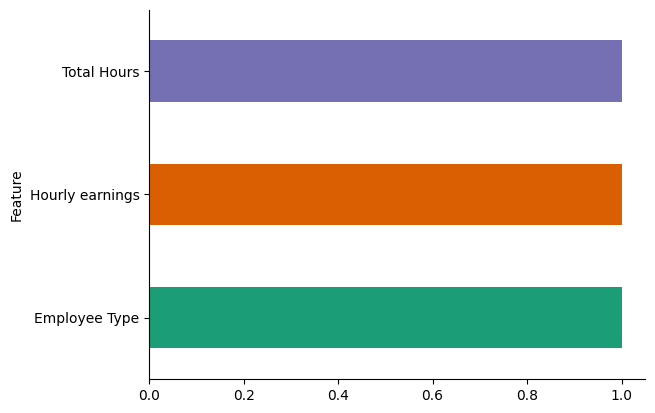

In [ ]:
# @title Feature

from matplotlib import pyplot as plt
import seaborn as sns
top_N_features.groupby('Feature').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
!pip install shap
import shap # Import shap

In [ ]:
# prompt: use deep learning instead of voting classifier

# Assuming X_train, y_train, X_test, and y_test are defined as in the previous code.

# Define the deep learning model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2) # Adjust epochs and batch size as needed


# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int) # Convert probabilities to binary predictions

#Further analysis using probabilities
# Example: Find employees likely to quit
# (assuming 'y_test' and 'y_pred_prob' are defined)
# Filter probabilities for those who haven't terminated
X_test_no_termination = X_test[y_test == 0]
y_pred_prob_no_termination = y_pred_prob[y_test == 0]
termination_probabilities = y_pred_prob_no_termination.flatten()  # Access the probabilities

# Sort the employees by their probability of termination
sorted_indices = np.argsort(termination_probabilities)[::-1]

# Display top N employees likely to quit
N = 20
top_N_likely_to_quit = sorted_indices[:N]

print("Indices of top", N, "employees likely to quit (among those who haven't terminated yet):")
top_N_likely_to_quit




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5112 - loss: 11136718.0000 - val_accuracy: 0.5597 - val_loss: 2129581.7500
Epoch 2/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4985 - loss: 1441163.1250 - val_accuracy: 0.4433 - val_loss: 1236861.5000
Epoch 3/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5177 - loss: 1485458.2500 - val_accuracy: 0.5567 - val_loss: 2321766.5000
Epoch 4/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5100 - loss: 2015997.5000 - val_accuracy: 0.5585 - val_loss: 717858.4375
Epoch 5/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5185 - loss: 1058104.5000 - val_accuracy: 0.5683 - val_loss: 407151.9062
Epoch 6/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5123 - loss: 2015403.3750 - val_accuracy: 0.4433 - val_loss: 435225.3438
Epoch 7/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5217 - loss: 1219615.2500 - val_accuracy: 0.5567 - val_loss: 1689112.0000
Epoch 8/10
203/203 ━━━

array([910, 304, 315, 314, 313, 312, 311, 310, 309, 308, 307, 306, 305,
       303, 317, 302, 301, 299, 298, 297])

In [ ]:
# prompt: train with deep learning models

import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_test, y_train, y_test are defined from the previous code

# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Deep Learning Model Improvements:
# 1. Add more layers or neurons (experiment with different architectures)
# 2. Use different activation functions (e.g., 'tanh', 'elu')
# 3. Try different optimizers (e.g., 'rmsprop', 'sgd')
# 4. Increase the number of epochs, but watch for overfitting
# 5. Use early stopping to prevent overfitting

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.BatchNormalization(), # Batch Normalization for improved training stability
    keras.layers.Dropout(0.3), # Increased dropout for more regularization
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])


# Compile the model with a different optimizer and learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])



model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int) # Convert probabilities to class labels

# Further analysis (e.g., confusion matrix, precision, recall) can be performed here


NameError: name 'X_train' is not defined

In [ ]:
# prompt: From these deep learning model, identify top 20 employees likely to terminate

# Assuming X_test_scaled, y_test, and the trained 'model' are available from the previous code.

# Filter the test set for employees who have not terminated (Termination == 0)
X_test_no_termination_scaled = X_test_scaled[y_test == 0]


# Predict the likelihood of termination for those employees using the deep learning model
y_pred_no_termination_prob = model.predict(X_test_no_termination_scaled)

# Get the probability of termination for each employee
termination_probabilities = y_pred_no_termination_prob.flatten()  # Flatten to a 1D array


# Sort the employees by their probability of termination
sorted_indices = np.argsort(termination_probabilities)[::-1]  # Sort in descending order

# Print the top N employees likely to quit (e.g., top 20)
N = 20
top_N_likely_to_quit = sorted_indices[:N]

# Print employee indices with the highest probabilities
print("\nIndices of top", N, "employees likely to quit (among those who haven't terminated yet, based on Deep Learning model):")
print(top_N_likely_to_quit)


# Get the original indices from the *original* X_test (before scaling)
top_N_indices_in_X_test = X_test.index[y_test == 0][top_N_likely_to_quit]

print("\nDetails of employees likely to quit (with original data):\n")
df.loc[top_N_indices_in_X_test]


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Indices of top 20 employees likely to quit (among those who haven't terminated yet, based on Deep Learning model):
[182  51  27 358 598 216 109 360 697 557 422  84 535 147 559 459 888 247
 909 726]

Details of employees likely to quit (with original data):



,LocationID,Original Hire Date,Most Recent Hire Date,Start Date,Job Title,Employee Status,Employee Type,Residence State,Residence Zip Code,Total Hours,Total Gross Earnings,Hourly earnings,Employee YTD Earnings,Employee YTD Hours,Duration,Original Hire Date_unix,Most Recent Hire Date_unix,Start Date_unix
2995,14,2023-09-14,2023-09-14,2023-09-14,325,0,0,0,35206,31.082127,483.987901,15.371053,1352.38,87.25,522.0,1694649600,1694649600,1694649600
8725,4,2024-06-20,2024-06-20,2024-06-20,301,0,0,9,30038,31.082127,483.987901,15.371053,1086.00,90.50,242.0,1718841600,1718841600,1718841600
2927,115,2023-09-05,2023-09-05,2023-09-05,237,0,0,30,15045,31.082127,483.987901,15.371053,536.00,33.50,531.0,1693872000,1693872000,1693872000
4220,4,2023-12-22,2023-12-22,2023-12-22,301,0,0,9,30315,31.082127,483.987901,15.371053,4713.00,376.00,423.0,1703203200,1703203200,1703203200
2540,4,2023-07-07,2023-07-07,2023-07-07,232,0,0,9,30127,31.082127,483.987901,15.371053,1439.75,110.50,591.0,1688688000,1688688000,1688688000
3846,71,2023-12-02,2023-12-02,2023-12-02,228,0,0,8,32822,31.082127,483.987901,15.371053,4130.00,290.00,443.0,1701475200,1701475200,1701475200
5427,45,2024-02-13,2024-02-13,2024-02-13,174,0,0,8,33065,31.082127,483.987901,15.371053,1914.50,133.00,370.0,1707782400,1707782400,1707782400
4890,29,2024-01-23,2024-01-23,2024-01-23,170,0,0,8,32738,31.082127,483.987901,15.371053,41.25,2.75,391.0,1705968000,1705968000,1705968000
6973,71,2024-04-10,2024-04-10,2024-04-10,160,0,0,8,32812,31.082127,483.987901,15.371053,1378.00,106.00,313.0,1712707200,1712707200,1712707200
4847,79,2024-01-23,2024-01-23,2024-01-23,301,0,0,8,33147,31.082127,483.987901,15.371053,29.25,2.25,391.0,1705968000,1705968000,1705968000


In [ ]:
unique_values = y_test.unique()
print("Unique values in y_test:", unique_values)

Unique values in y_test: [0 1]


In [ ]:
!pip install shap

In [ ]:
# prompt: Analyse feature importance from this deep learning model

import shap
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Assuming X_train_scaled and the trained 'model' are available
background_data = shap.sample(X_train_scaled, 500)  # Example: using 500 samples
explainer = shap.KernelExplainer(model, background_data)
shap_values = explainer(X_test_scaled)
# Explain the model's predictions using SHAP values
#explainer = shap.KernelExplainer(model, X_train_scaled) # Use KernelExplainer for deep learning models
#shap_values = explainer.shap_values(X_test_scaled)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_train.columns)

# Analyze individual predictions
# Example for the first instance in the test set:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test_scaled[0,:], feature_names=X_train.columns)


NameError: name 'X_train' is not defined

In [ ]:
# Analyze feature importance from the deep learning model (using SHAP values)
import shap

# Explain the model's predictions using SHAP values
explainer = shap.DeepExplainer(model, X_train_scaled)
shap_values = explainer.shap_values(X_train_scaled)

/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py:155: UserWarning: You have provided over 5k background samples! For better performance consider using smaller random sample.
  warnings.warn("You have provided over 5k background samples! For better performance consider using smaller random sample.")
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(8118, 12))']
  war

KeyboardInterrupt: 

In [ ]:
shap_values[0]

In [ ]:

import matplotlib.pyplot as plt

# Assuming 'shap_values' and 'X_train' are already calculated
features = X_train_scaled.columns.tolist()

shap.summary_plot(shap_values[0], X_train_scaled, feature_names=features, plot_type="bar")
plt.title("SHAP Summary Plot - Feature Importance")
plt.show()

In [ ]:
# prompt: reshape shap_values to dimensions of y_test

# Reshape shap_values to the dimensions of y_test
shap_values_reshaped = shap_values[0]

# Now shap_values_reshaped should have the same number of rows as y_test
print("Shape of reshaped shap_values:", shap_values_reshaped.shape)
print("Shape of y_test:", y_test.shape)


In [ ]:
# Get SHAP values for the employees who haven't terminated
# Reshape shap_values and apply boolean mask
shap_values_reshaped = shap_values[0].reshape(X_test_scaled.shape[0], X_test_scaled.shape[1])
mask = y_test == 0
shap_values_no_termination = shap_values_reshaped[mask]
#shap_values_no_termination = shap_values[0][y_test == 0]  # Assuming it's a binary classification

# Calculate the mean absolute SHAP value for each feature
mean_abs_shap_values = np.mean(np.abs(shap_values_no_termination), axis=0)


# Create a DataFrame to display feature importances based on SHAP values
feature_names = X_test.columns
shap_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': mean_abs_shap_values})
shap_importance_df = shap_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance based on SHAP values:\n", shap_importance_df)

# Display the top N features driving attrition according to SHAP
N = 3 # Number of top features
top_N_features_shap = shap_importance_df.head(N)
print(f"\nTop {N} features driving attrition (based on SHAP values):\n")
top_N_features_shap
